# Gráficos do K6

Importando libs e definindo funções para formatar as métricas e plotar as métricas

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

def load_data(input_file):
    with open(input_file, 'r') as file:
        #return 
        return pd.DataFrame(json.load(file))
    

def format_metrics(input_file):
    with open(input_file, "r") as file:
        # Carrega o conteúdo JSON do arquivo
        data = json.load(file)

    formatted_data = []

    # Para cada item no array...
    for item in data:
        # Verificando se o item tem "data.value", se não tiver, vá para o proximo
        if "data" in item and "value" in item["data"]:
            metric = item.get("metric")
            value = item["data"]["value"]
            itemtype = item["type"]
            timestamp = item["data"]["time"]

            if metric == "checks":
                # Formatação específica para "checks"
                metric = item["data"]["tags"]["check"]
                formatted_data.append(
                    {
                        "metric": metric,
                        "value": value,
                        "date": pd.to_datetime(timestamp),
                        "type": itemtype,
                    }
                )
            else:
                # Formatação padrão
                formatted_data.append(
                    {
                        "metric": metric,
                        "value": value,
                        "date": pd.to_datetime(timestamp),
                        "type": itemtype,
                    }
                )

    # Retorna os dados como dataframePandas
    return pd.DataFrame(formatted_data)

def plot_metrics(df):
    # Filtra as métricas que queremos plotar
    metrics_to_plot = [
        "http_req_duration",
        "http_reqs",
        "checks",
        "vus",
        "data_sent",
        "data_received",
    ]

    for metric in metrics_to_plot:
        metric_data = df[df["metric"] == metric]

        if not metric_data.empty:
            plt.figure(figsize=(10, 5))
            plt.plot(metric_data['data'], metric_data['value'], marker='o', linestyle='-', label=metric)
            plt.title(f'Métrica: {metric}')
            plt.xlabel('Tempo')
            plt.ylabel('Valor')
            plt.xticks(rotation=45)
            plt.grid()
            plt.legend()
            plt.tight_layout()
            plt.show()  # Exibe o gráfico no notebook


## Gráficos para /GET

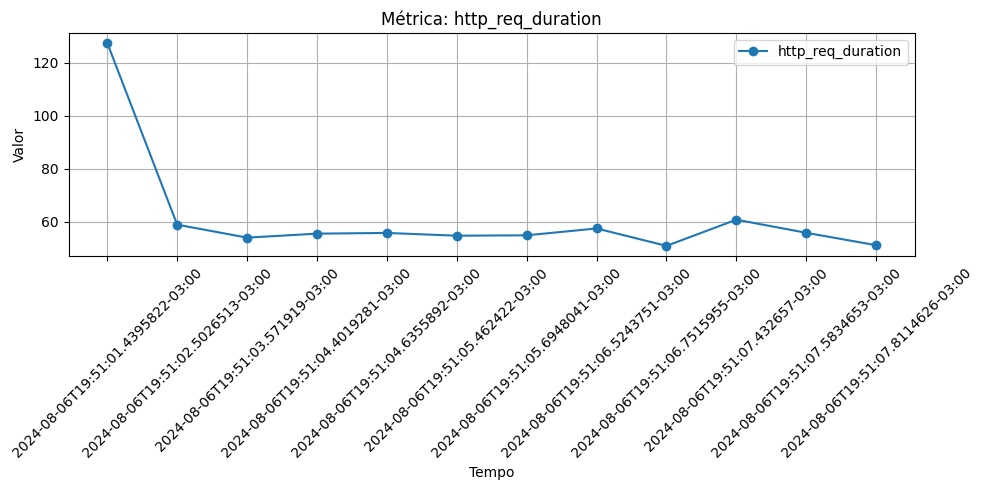

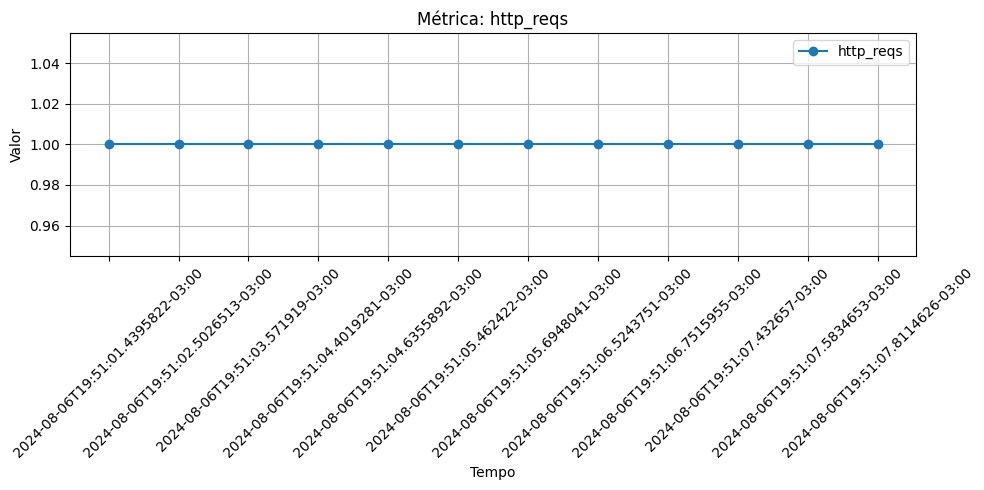

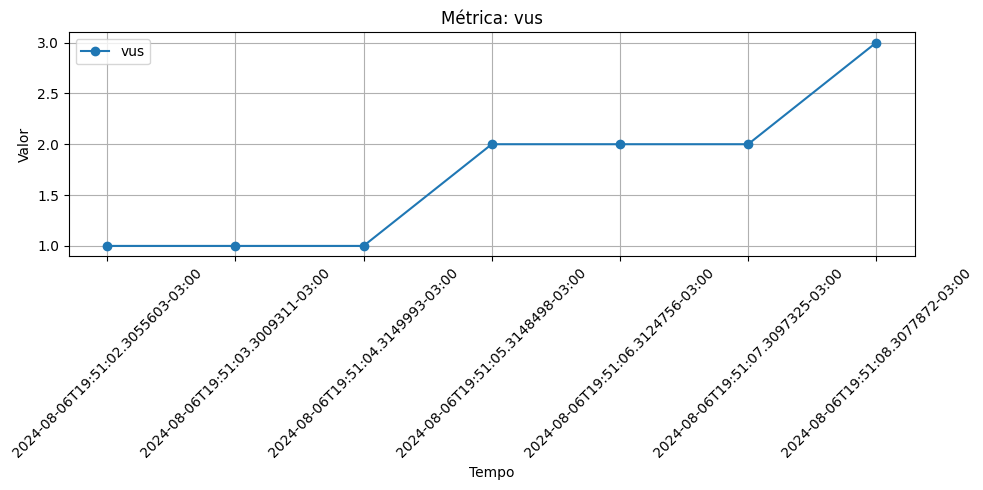

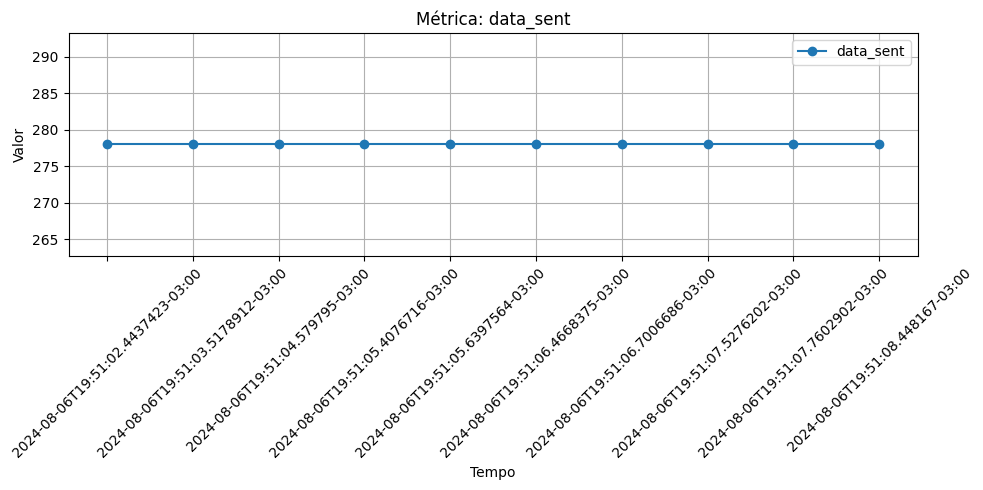

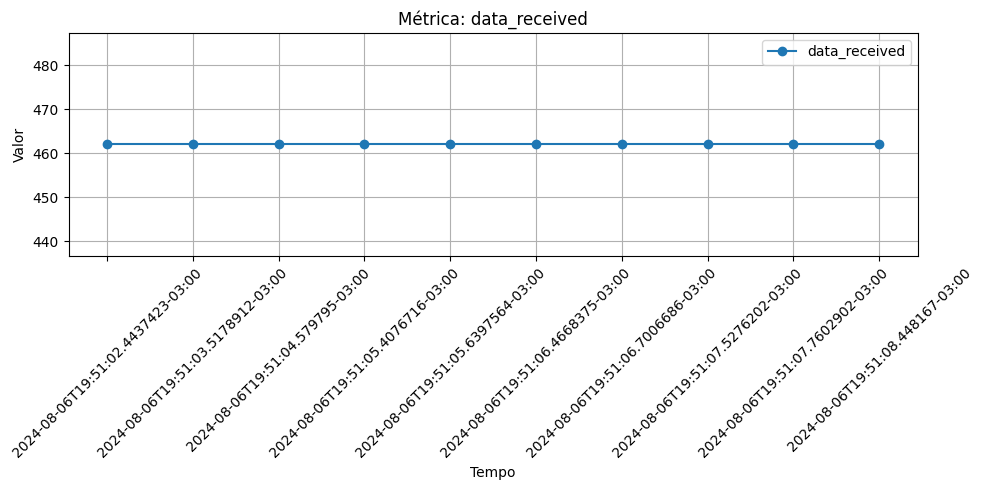

In [3]:
avaliacoesK6 = load_data(
        "./resultadoTarefasFormatado200Limpo.json"
    )
plot_metrics(avaliacoesK6)

## Gráficos para /POST

In [ ]:
tarefasK6 = format_metrics("./resultadoTarefasFormatado.json")  
plot_metrics(tarefasK6)

NameError: name 'format_metrics' is not defined